In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [3]:
df=pd.read_csv('monthly_milk_production.csv', index_col='Date', parse_dates=True)
df.index.freq='MS' #dealing wiht onthly data

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

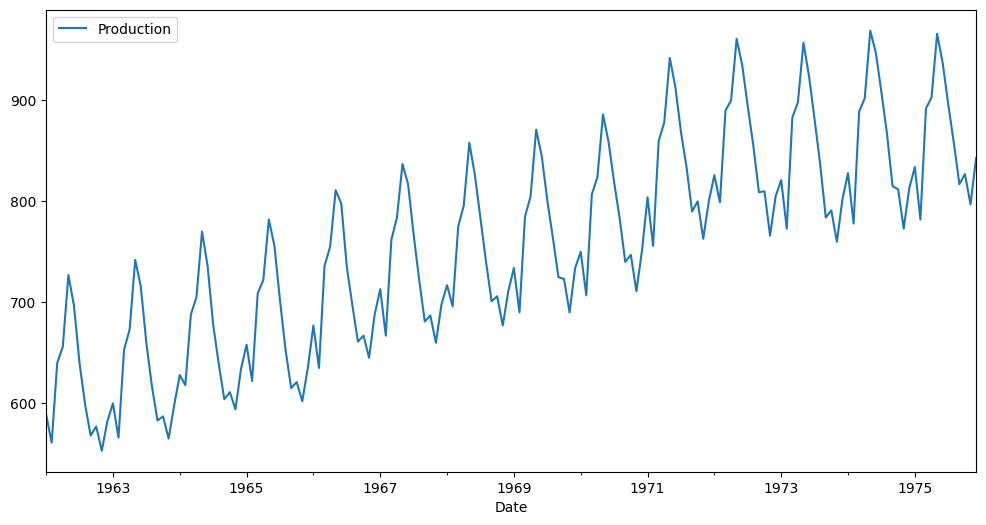

In [5]:
df.plot(figsize=(12,6))

In [7]:
train=df.iloc[:156]
test=df.iloc[156:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df.head()
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [9]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [11]:
from tensorflow.keras.utils import timeseries_dataset_from_array


n = 3  # Sequence length
batch_size = 1

# Create time series dataset (auto-regressive setup)
gen = timeseries_dataset_from_array(
    data=scaled_train[:-1],  # Input sequence data
    targets=scaled_train[n:],  # Targets shifted by n steps
    sequence_length=n,
    batch_size=batch_size
)

# Get first batch
for batch in gen.take(1):
    X, y = batch
    print(f'Given the array: \n{X.numpy().flatten()}')
    print(f'Predict this y: \n {y.numpy()}')

Given the array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model=Sequential()
model.add(LSTM(100,activation='relu', input_shape=(n,batch_size)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



c:\Users\dhrit\OneDrive\Desktop\TY SEM2\deep learning\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(gen, epochs=10)

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0334
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0311
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221
Epoch 9/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197
Epoch 10/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179


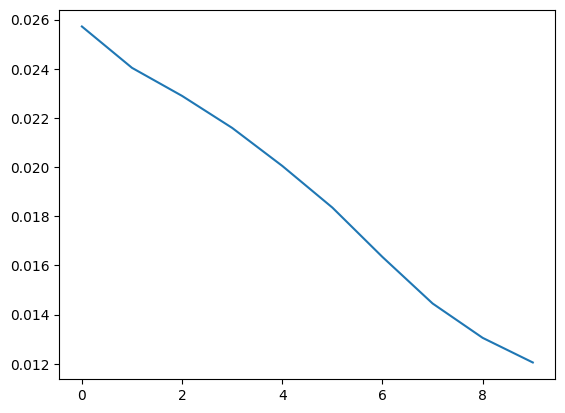

In [25]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [30]:
last_train_batch=scaled_train[-12:]

In [34]:
last_train_batch = last_train_batch[-n:]

# Reshape to match the model's input shape
last_train_batch = last_train_batch.reshape(1, n, batch_size)

# Make predictions
prediction = model.predict(last_train_batch)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Prediction: [[0.6960987]]


In [35]:
scaled_test[0]

array([0.67548077])

In [36]:
test_predictions=[]

first_eval_batch= scaled_train[-n:]
current_batch=first_eval_batch.reshape(1,n,batch_size)

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


[array([0.6960987], dtype=float32),
 array([0.7787992], dtype=float32),
 array([0.8311443], dtype=float32),
 array([0.85617125], dtype=float32),
 array([0.8490588], dtype=float32),
 array([0.824369], dtype=float32),
 array([0.7889082], dtype=float32),
 array([0.76228935], dtype=float32),
 array([0.7501006], dtype=float32),
 array([0.7569312], dtype=float32),
 array([0.7736866], dtype=float32),
 array([0.7933022], dtype=float32)]